## Scientific question: How structurally similar pathogenesis response proteins in apples (Mal d 2) are compare to the pathogenesis response proteins in cherry (Pru av 2)?

Background: Allergy is a steadily increasing health problem for all age groups in our society. Recent studies have found that allergenic proteins from very different sources can have nearly identical sequences and structures, and that this similarity can account for clinically observed cross-reactivity. That's being said, by looking structural similarity of pathogenesis response proteins among different orgranisms, we can identify potential allergen of a person who we already know what he is already allergic to. Some studies have identified common molecular features of proteins from quite different sources, which could account for clinically important cross reactivity and sensitivity. For example, major allergenic proteins in peanut have been isolated, and peptides from their sequences that react with IgE from patient sera identified (Rabjohn P, Helm EM, Stanley JS, West CM, Sampson HA, Burks AW, Bannon GA). Proteins similar to these allergens were subsequently found in other foods that are known to elicit clinically significant responses in peanut allergic individuals (Schein CH, Ivanciuc O, Braun W), such as tree nuts (de Leon MP, Glaspole IN, Drew AC, Rolland JM, O'Hehir RE, Suphioglu C), soy, and legumes. In this study, I will focus on the structural similarity between pathogenesis response proteins in apple and cherry. Mal d 1 is a 17.5 kDa protein containing 480-483 nucleotides encoding 158-159 amino acids and it's the major apple allergen (Thermal fisher). The 23 kDa thaumatin-like protein (TLP) from cherry was identified as a major allergen and designated Pru av 2 (H.C.FuchsaC.RadaueraA.MaribF.AltmanncM.Bublin). If those two proteins are highly structrally similar, then we can conclude that people that are allergic to apple have higher chance of being allergic to cherry, so they should avoid consuming such food.

## Scientific Hypothesis: If the mRNA sequence of Mal d 2 from publically available databases has high alignment score with Pru av 2 after perform pairwise sequence alignment, and the protein structure of these two can be aligned, then we can conclude that the pathogenesis response proteins in apples (Mal d 2) are structurally similar to that in cherry (Pru av 2).

Previous studies have identified common molecular features of proteins from quite different sources, which could account for clinically important cross reactivity and sensitivity. In this study, we want to compare the structral similarity between two proteins. We can do this by pairwise alignment sequencing and structural 
Bioinformatics (protein alignment through Pymol). First we want to compare the mRNA sequence of Mal d 2 and Pru av 2 from publically available database. I used the mRNA sequence of cherry (Pru av 2)from NCBI(https://www.ncbi.nlm.nih.gov/nuccore/U32440) and mRNA sequence of apple (Mal d 2) from NCBI(https://www.ncbi.nlm.nih.gov/nuccore/AF090143). I then use pairwise alignment sequence technique to analyze the alignment between those two sequences in python (code source: https://towardsdatascience.com/pairwise-sequence-alignment-using-biopython-d1a9d0ba861f). Then, I do the protein alignment in Pymol. I then did 3D protein measurement by calculating the distance between the alpha carbons for a pair of residues from the PDB file I download from RCSB PDB database.

## Part 1: Load the package

- Bio: The Bio package is Python tools used for computational molecular biology. It's a popular Python modules that can solve many bioinformatics questions. The developers  are a member project of the Open Bioinformatics Foundation (OBF). Some useful tools in Bio includes pairwise2 and PDB. Here I used both pairwise2 and PDB to do the pairwise alignment as well as show the protein structure from databases. The source code available every license in the world. More information about this package can be found in here: https://biopython.org/

- nglview: The nglview package is Python tools used to interactively view molecular structures and trajectories. It utilizes the NGL Viewer for rendering. It supporst data from the file-system, RCSB PDB, simpletraj and from objects of analysis libraries such as rdkit, ase, HTMD, and biopython. Here I used nglview to show the protein structure from RCSB PDB database. More information about this package can be found in here: https://github.com/nglviewer/nglview

- IPython: The IPython package is a powerful interactive shell. It can support interactive data visualization. We can use Ipython to embed flexible interpreters into the Jupyter notebook. It's very easy to use, and here I use this package to import the YouTubeVideo in order to show the protein alignment video I have created. IPython also support in multiple programming languages such as Javascript, CSS, HTML. More information about this package can be found in here: https://ipython.org/

- numpy: The NumPy package is a Python library used for working with arrays. We can use numpty to create, add element, delete element, create 2D matrix, and etc. It is often widely used in math and data science for working in domain of linear algebra and matrices. Here I used NumPy to create 2D matrix array for the use of creating heatmap plot. More information about numpy can be found in here: https://numpy.org/

- seaborn: The Seaborn package is a library for making statistical graphics in Python. It is built on top of matplotlib and pandas data structures. The plotting functions allow us to produce informative plots. Here I use seabron to creat heatmap plot from 2D array. This package is dataset-oriented, so we can focus on what the different elements of your plots mean, rather than on the details of how to draw them. More information about seaborn can be found in here: https://seaborn.pydata.org/

- matplotlib: The Matplotlib package is a libarary for plotting in Python programming. It is built on top of NumPy and it provides API for putting plots into applications using GUI. Here I used matplotlib to add x and y labels and show the graph after creating heatmap plot from 2D array. It can also be used to plot dotplot, bar, stem, and etc. More information about matplotlib can be found in here: https://matplotlib.org/

In [80]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import *
import nglview as nv
from IPython.display import YouTubeVideo
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## Part 2: Load in the data and perform Bioinformatics Analyses (pairwise sequencing, 3D protein alignment, 3D protein measurement)

The sequence data from below are downloaded from NCBI database. I used global alignment in here in order to find the best alignment over the entire lengths of the 2 sequences, i.e. What is the maximum similarity between sequence X and Y. In this method, we consider the entire length of the 2 sequences and try to match them to obtain the best alignment. It is obtained by inserting gaps (spaces) to X and Y until the length of the two sequences will be the same so that the two sequences are matched. We set a scoring scheme as match score = 1, mismatch score = 0 and gap penalty = 0.

In [84]:
# Define two sequences to be aligned
Pru_av_2 = "ttcggcacgaggcaaacaggcaattaagacatattcaatgtcgatgatgaagagccaagtagctcctcggcctaccttggccatcctcttcttcttctcaggtgcacatgcagcgaaaatcactttcacaaacaactgccccaacactgtctggccaggaaccttaaccggtgaccaaaaacctcagttatcactcaccggcttcgaactagcatccaaagctagccgatcagtggacgctccatctccatggtctggtcgcttctggggccgaaccagatgctccacggacgccgctggaaaattcacttgtgaaactgcagactgtggctctggccaggtcgcatgcaacggggcaggcgcagttccaccagcaactttagttgaaatcacaattgcggcaaacgggggtcaagattattatgatgttagccttgttgacggcttcaacttgcctatgtctgtcgccccacaaggtggcacgggcgagtgcaagccctcgtcttgccctgccaatgttaacaaggtgtgcccggctccacttcaagtgaaagcggctgatgggagtgtcatcagttgcaaaagcgcttgccttgcgtttggtgattcgaagtactgctgcactccgccgaataatacgccggagacatgtcctcccacagagtactctgagatctttgagaagcagtgccctcaagcttatagctacgcttatgatgataaaaacagcacatttacctgcagtggtggacctgactacgtcattactttctgcccataagcacgaaatgggattatatatgcagatgatgatatctgtttctttatgtaacaataatgaagaagaataaattccgcggacgttgacacattgctgttgtcaagaatttgtaatactaattacacgatcaaataaaggaacaaatattatatttaaaaaaaaa"
Mal_d_2 = "aagacattgcgatgatgaagaccctagtagtagtcctcagcctcagcttaaccatcctttccttcggaggtgcacatgcagcgacaatttctttcaaaaacaattgcccctacatggtctggccaggaaccctaacctccgatcaaaaacctcaattatcaaccacagggttcgagttagcatcccaagctagcttccagctagacactccggtgccgtggaacggtcgcttctgggcccgaactggatgctccacggatgcctctggaaagttcgtctgcgccaccgcagactgtgcctctggtcaggtcatgtgcaacggtaacggtgccattccaccggcaactttagcggaattcaatattccagcaggcggaggacaagatttctacgacgttagccttgttgatggcttcaacttgcccatgtctgttactccacaaggcggtaccggcgactgcaagacggctagttgcccggcgaacgtgaacgcagtttgtccgagtgagctgcaaaagaaagggtctgatgggagcgtggttgcctgcttgagcgcatgtgttaaattcggtacgccacagtactgttgcactccgcctcaaaacactccagagacatgcccaccgacaaactactctgagatattccataacgcatgccccgacgcttacagctatgcttatgatgacaaaaggggtacatttacatgcaatggtggacctaactacgccattactttctgcccatgatgagcatacatatatatgaactatagaaaggacaagatctttaataaagataggactctcgacatgtaatgtgtcgataattagtccagctctatattaaacgtttgatctttaataaaggtaagactctcggcatgtaattggtaacgtgtcgattattgtagtctgactatgtatcaagcatttgatcttcaataaagatagaattgtccacatgta"

# Get a list of the global alignments between the two sequences satisfying the given scoring
# A match score is the score of identical chars, else mismatch score.
# Same open and extend gap penalties for both sequences.
# Use built in function pairwise2.align. globalxx to perform alignment.
alignments = pairwise2.align.globalxx(Pru_av_2, Mal_d_2)

# Use format_alignment method to format the alignments in the list
# check that the alignment performed correctly by using the line below
# this is a code check
for a in alignments:
    print(format_alignment(*a))


ttcggcacgaggcaaacaggcaattaagacatattcaatgtcgatgatgaagagcc--a--agtagctcctcg-gcctac--cttgg--ccatcctcttcttcttctc--aggtgcacatgcagcgaa-aatca--ctttcacaaa-caact-gcccca-acactg-tctggccaggaacct-taaccggt--gac-caaaaacctcag-ttatca-ctcacc-ggc-ttcgaac-t-agcatcca-aagctagccgat-c-ag-tg-gacg-ctccatc--t-cca-tggt--ctggtcgcttctggggcc-gaacca-g-atgctccacggac-gccg-ctggaaaa-ttcac-t-tgt-gaa--act-gcagactgtggc-tctggc-caggtcgcatg--caacggggc-a--ggc-gc-agttccaccag-caactttagtt-ga-aat-caca-attgcggcaaa-c-gg-gg-gt--caagattat-tat-gat-gttagccttgttgac-ggcttcaacttgcct-atgtctgtcgc--c-ccacaaggt-ggc-acg-ggcgag-tgcaagc-c--ctc-gtcttgccctgc-c-aat-gtt-aacaag--gtgt-gc-ccg-gctcc-a-ctt-caagt--gaaagcgg-ctgatgggagtgtca-tcag-ttgcaaaagc-gcttg--c-ct-tgc-gtt---t--ggtgattcg--a-agtactgct-gcactccgccg--aataat-acg-ccg-gagacatgtcctc-cc-acagag--tactctgagatct-ttg--ag-aa-gcagtgccctca-a-gcttat-agctac-gcttatgatgataa-aaacagc----acatttacc-tgcag-tggtggacctga-ctacgtc-attactttctgcccata-a-gcacg-a-a-atgggat-tat-a--tat-g------ca-gatg----a-t---gata----tct-g---t

## Part 3: Plot the result to show the pairwise alignment scores between Mal_d_2 and Pru_av_2 sequences.

A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The colors here are showing if a match has been found between two sequences. White means a match and black means a mismatch.

In [76]:
#create empty 2D matrix array, Define a global variable arr based on the function defined
# below.
arr = np.zeros((len(Mal_d_2),len(Pru_av_2)))

#define function to populate the matrix based on alignment score
def heatmapMatrix(a, b):
    #check if two sequences are valid
    if a is None or b is None:
        print("Not a valid sequence")
        return
    #iterate through every nucleotide in the sequences
    for p in range(len(Mal_d_2)):
        for q in range(len(Pru_av_2)):
            if(a[p] == b[q]):
                arr[p,q] = 1 # Updating the counter when characters are same at an index             

heatmapMatrix(Mal_d_2,Pru_av_2)

#this is a code check
print(arr)


[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


Here we are using matplotlib and seaborn to create a heatmap plot that will be printed out below. The x and y axes will be labeled based on the position in sequences. The color bar is added, white means a match (score 1.0) and black means a mismatch (score 0.0). X and y axis ticks are added, and the plot is saved and displayed. Heatmaps are a data visualization technique for viewing the magnitude of phenomenon as a color out of a gradient of colors. Heatmaps are 2D graphs and can often be used to show the relative amount of a substance, or in this case, the alignment scores between all nucleotides compared. This sort of plot could be used to compare the alignment scores between a set of sequences.

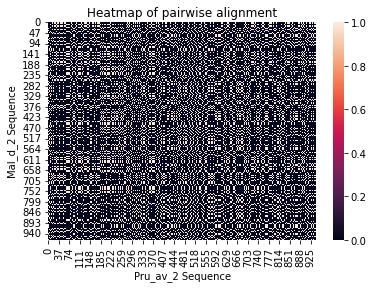

In [77]:
#use built in function heatmap to create heatmap, passing in arr created before and store the final result in the variable ax
#title with Heatmap of pairwise alignment
ax = sns.heatmap(arr).set(title='Heatmap of pairwise alignment')
plt.xlabel("Pru_av_2 Sequence")
plt.ylabel("Mal_d_2 Sequence")
#show the plot
plt.show()

## Part 3B: show the protein structure from RCSB PDB for the interested proteins, and performed protein alignment through Pymol.

Then, I performed 3D protein alignment through pymol. I get the pathogenesis response proteins in apples (Mal d 2) which has id: 5MMU, and the pathogenesis response proteins in cherry (Pru av 2) which has id: 1E09 from RCSB PDB. Here I show the protein 3D strucutre for both proteins.
Source: https://www.rcsb.org/search?request=%7B%22query%22%3A%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22terminal%22%2C%22service%22%3A%22text%22%2C%22parameters%22%3A%7B%22attribute%22%3A%22struct_keywords.text%22%2C%22operator%22%3A%22contains_phrase%22%2C%22value%22%3A%22PR-10%20protein%20apple%20allergen%2C%20ALLERGEN%22%7D%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%5D%2C%22logical_operator%22%3A%22and%22%2C%22label%22%3A%22text%22%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%2C%22return_type%22%3A%22entry%22%2C%22request_info%22%3A%7B%22query_id%22%3A%22be8e85741a18a79e455f977d6bc4d7d1%22%7D%2C%22request_options%22%3A%7B%22pager%22%3A%7B%22start%22%3A0%2C%22rows%22%3A25%7D%2C%22scoring_strategy%22%3A%22combined%22%2C%22sort%22%3A%5B%7B%22sort_by%22%3A%22score%22%2C%22direction%22%3A%22desc%22%7D%5D%7D%7D

In [86]:
view = nglview.show_pdbid("5MMU")  # load "5MMU" from RCSB PDB
view

NGLWidget()

In [82]:
#perform 3D protein measurement
parser = PDBParser()
structure = parser.get_structure("5MMU", "5mmu.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[32.285 30.523 14.656] - [34.66  31.285 17.526] = 3.802388906478882


In [79]:
view2 = nglview.show_pdbid("1E09")  # load "1E09" from RCSB PDB and display viewer widget
view2

NGLWidget()

In [83]:
#perform 3D protein measurement
parser = PDBParser()
structure = parser.get_structure("1E09", "1e09.pdb")

residues = [r for r in structure.get_residues()]
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[-6.219 41.817  0.153] - [-5.937 42.038 -3.653] = 3.822826385498047


- Then, the following code has been put into Pymol to perform the protein alignment:

PyMOL>fetch 5MMU
TITLE     NMR solution structure of the major apple allergen Mal d 1
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "./5mmu.cif" loaded as "5MMU".
 
 PyMOL>fetch 1E09
TITLE     Solution Structure of the Major Cherry Allergen Pru av 1
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "./1e09.cif" loaded as "1E09".
 You clicked /2AHN/A/A/TRP`52/CA
 Selector: selection "sele" defined with 14 atoms.
 
PyMOL>align 5MMU, 1E09
 Match: read scoring matrix.
 Match: assigning 158 x 159 pairwise scores.
 MatchAlign: aligning residues (158 vs 159)...
 MatchAlign: score 697.000
 ExecutiveAlign: 2354 atoms aligned.
 ExecutiveRMS: 74 atoms rejected during cycle 1 (RMSD=2.72).
 ExecutiveRMS: 62 atoms rejected during cycle 2 (RMSD=2.37).
 ExecutiveRMS: 28 atoms rejected during cycle 3 (RMSD=2.25).
 ExecutiveRMS: 16 atoms rejected during cycle 4 (RMSD=2.20).
 ExecutiveRMS: 12 atoms rejected during cycle 5 (RMSD=2.18).
 Executive: RMSD =    2.157 (2162 to 2162 atoms)

An animation movie has been created to show the protein alignment:

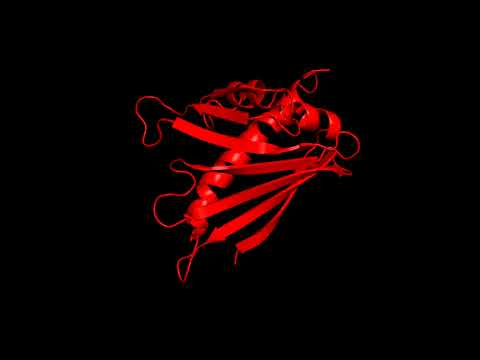

In [32]:
YouTubeVideo('6hkD1EdG_a8', width=600, height=300)

## Part 4: Analysis of the results

The pairwise alginment code returns a high alignment score (723) between Pru_av_2 and Mal_d_2. This indicates a potential functional and structural relationships between nucleic acid sequences in pathogenesis response proteins in apples and cherries. The heatmap above shows the similarities in different positions in nucleotide sequences. We can also observe a massive chunk of white area, implying a sequence identical region between two sequences. To further validate if two proteins have structural similarity, a protein alignment is performed through Pymol and RMSD =  2.157 is return. RMSD is always greater than 0 and RMSD = 0 means perfect alignment. RMSD = 2.157 indicates a really good protein alignment and from the animation I created it can also be observed that two pathogenesis response proteins in apple and cherry has high structural similarity. Thus, my hypothesis was correct and these two proteins are highly structurally similar. 